In [1]:
# setu up
import sys
assert sys.version_info >=(3,5)

# sckit learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common Import
import os
import pandas as pd
import numpy as np

# to make the notebook are stable accros to run
np.random.seed(42)

# to plot preity figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

# Save the figure on the path sub folder
ROOT = '.'
CHAPTER_ID = 'Decision Tree'
IMAGES_PATH = os.path.join(ROOT,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension='png',resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id + "."+fig_extension)
    print("saving figure ",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)


# Training and visualizing a decision tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris['data'][:, 2:] # petal length and width
y = iris['target']

In [4]:
tree_clf_1 = DecisionTreeClassifier(max_depth=2,criterion='gini')
tree_clf_1.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [5]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf_1,
    out_file = os.path.join(IMAGES_PATH,"iris_tree.dot"),
    feature_names = iris.feature_names[2:],#petal length and width
    class_names=iris.target_names,
    rounded=True,
    filled = True
)
# Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

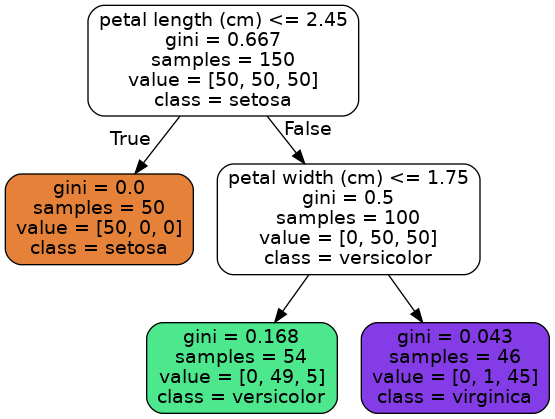

In [6]:
from IPython.display import Image
# ![title](images\Decision Tree\iris_tree_1.png)
Image('images\Decision Tree\iris_tree_1.png')

# Make an Prdictions analysist

In [7]:
from matplotlib.colors import  ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True,legend=True,plot_training=True):
    # create plot data sesuai distances cartesiusnya
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    # meshgrid
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]# 1 baris
    y_pred = clf.predict(X_new).reshape(x1.shape) # 100 pred
    custom_cmap = ListedColormap(['#fafab0','#a0faa0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


saving figure  decision_tree_decision_boundaries_plot2


C:\Users\User\AppData\Local\Temp\ipykernel_13428\3079201163.py:36: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


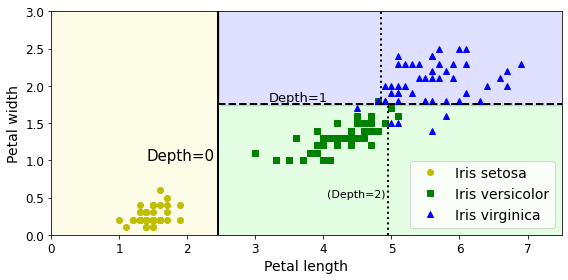

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_1, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
save_fig("decision_tree_decision_boundaries_plot2")
plt.show()

# Compare

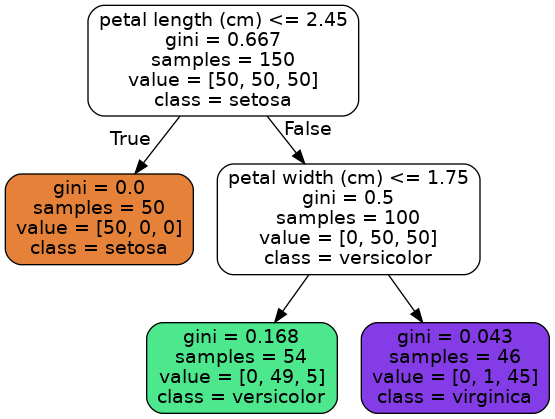

In [9]:
from IPython.display import Image
# ![title](images\Decision Tree\iris_tree_1.png)
Image('images\Decision Tree\iris_tree_1.png')

- pada pure decision (yellow) is pure sentosa
- pada impure decision is gini not null semakin besar gini maka semakin impure
    - pada decision(green) terdapat 5 false positif sebagai virginica
    - pada decision(purple) terdapat 1 false negatif sebagai versicolor 

In [10]:
a1 = np.linspace(0,1,3)
a2 = np.linspace(0,1,2)
"""
a1 = [0, 0.5, 1]
a2 = [0,1]
"""
m1,m2 = np.meshgrid(a2,a1)# kolom, baris
# m1 = format a1,  m2 = format a2
print(m1)
print(m2)

[[0. 1.]
 [0. 1.]
 [0. 1.]]
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


# Estimating class probabilitas

In [12]:
tree_clf_1.predict_proba([[3,2]])

array([[0.        , 0.02173913, 0.97826087]])

benar data lebih ke iris virginicia

In [15]:
label = ["Setosa","Versicolor","Virginicia"]
label[np.argmax(tree_clf_1.predict_proba([[3,2]]))]

'Virginicia'